# --------------------- Mercedes Benz Self Case Study --------------------- 

Source link: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

In [9]:
from IPython.display import Image

![title](daimler-mercedes_V02.JPEG)

# Description

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.___

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.___

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.___

## Objective:

##### We need to predict the time in seconds that car takes to pass the testing.

## Metric

##### R^2 (Coefficient of determination):

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

Source: https://en.wikipedia.org/wiki/Coefficient_of_determination

## Type of Machine Learning Problem

 - ___This is a regression problem where we need to predict the time in seconds that the car takes to pass the testing.___
 - ___Independent variables contains few categorical features and few numerical features (binary features).___
 - ___Dependent variable is continuous numbers which denotes the time in seconds.___
 
##### Our Objective is to predict the time in seconds of the testing set.

##### Importing necessary in-built libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [726]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# df_tr = pd.read_csv('train.csv')

In [727]:
# Importing dataset

print("\nImporting dataset train.csv and displaying head of dataframe\n")
df_tr = pd.read_csv('drive/My Drive/Mercedes Benz/train.csv')
df_tr.head()


Importing dataset train.csv and displaying head of dataframe



,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Observation

 - ___Column 'y' is the dependent/target variable.___
 - ___Dependent/target variable has continuous values. This is a regression problem.___
 - ___There are 376 independed variables.___

### Exploratory Data Analysis

In [728]:
print()
print("-> Shape of train dataframe:", df_tr.shape, '\n')
print("-> Number of rows in train dataframe:", df_tr.shape[0], '\n')
print("-> Number of columns in train dataframe:", df_tr.shape[1], '\n')
print("-> Column names of dataframe\n", df_tr.columns)


-> Shape of train dataframe: (4209, 378) 

-> Number of rows in train dataframe: 4209 

-> Number of columns in train dataframe: 378 

-> Column names of dataframe
 Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


In [729]:
df_tr.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.004514,0.232359,0.033262,0.000238,0.000713,0.011404,0.000238,0.072226,0.011404,0.253267,0.597292,0.012830,0.022333,...,0.022333,0.047517,0.0,0.947256,0.044904,0.338798,0.297220,0.054170,0.002138,0.202899,0.380375,0.179853,0.001188,0.426942,0.031837,0.076503,0.966025,0.520314,0.753861,0.002851,0.002851,0.001188,0.051794,0.062723,0.000475,0.006652,0.014255,0.000475,0.019244,0.227370,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.067043,0.422387,0.179341,0.015414,0.026691,0.106192,0.015414,0.258893,0.106192,0.434934,0.490501,0.112552,0.147782,...,0.147782,0.212768,0.0,0.223549,0.207117,0.473357,0.457089,0.226379,0.046198,0.402205,0.485537,0.384110,0.034450,0.494693,0.175586,0.265832,0.181186,0.499647,0.430812,0.053325,0.053325,0.034450,0.221637,0.242492,0.021796,0.081300,0.118555,0.021796,0.137399,0.419183,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000

### Observation:

 - ___Maximum time took to test car is 265.32 seconds.___
 - ___Minimum time took to test car is 72.11 seconds.___
 - ___Average time took to test car is 100.669 seconds.___

### Pandas Profiling:

One of the best package to analyse data which gives histogram, quantile statistics, missing values, unique values, descriptive statistics, most frequent and correlation.

Source: https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-python-ec18c6396e6b


***
##### pip install pandas-profiling
##### or
##### conda install -c anaconda pandas-profiling
***

In [7]:
import pandas_profiling as pp

pp.ProfileReport(df_tr)

### Observation:

 - ___Variable Type___

    - ___Numeric - 2___
    - ___Categorical - 8___
    - ___Boolean - 272___
    - ___Rejected - 96___

### Visualisation of correlation between variables with heatmap.

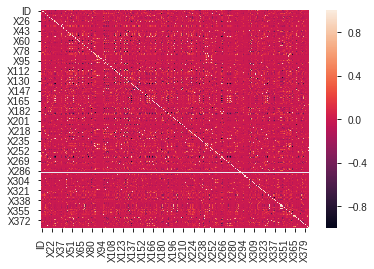

In [731]:
%matplotlib inline

sns.heatmap(df_tr.corr())


### Observation:

 - ___It is quite hard to analyse which features are correated and which are not. Anyway, we have detail data of correlation varaibles which we have viewed using profiling package.___

#### Features with constant value 0 or 1
 - ___We will remove features with constant value 0 or 1.___

In [0]:
# Not considering columns of categorical type

df_tr_cor_type = df_tr.select_dtypes(exclude = [object])

con_val = []

for i in range(len(df_tr_cor_type.columns)):
    j = df_tr_cor_type.columns[i]
    
    # Constant value 0
    if df_tr_cor_type[j].max() == 0 and df_tr_cor_type[j].min() == 0:
        con_val.append(df_tr_cor_type.columns[i])
    
    # Constant value 1
    if df_tr_cor_type[j].max() == 1 and df_tr_cor_type[j].min() == 1:
        con_val.append(df_tr_cor_type.columns[i])

In [733]:
print("\n-> Number of features with constant value 0:", len(con_val), '\n')
print("-> Number of features which should not be considered for analysis:", len(con_val), '\n')


-> Number of features with constant value 0: 12 

-> Number of features which should not be considered for analysis: 12 



In [734]:
print("\n-> Removing", len(con_val), "features which has constant value 0 or 1.\n")
print("-> Number of columns in train dataframe before removing features:", df_tr.shape[1], '\n')

df_tr_up = df_tr.drop(con_val, axis = 1)

print("-> Number of columns in train dataframe after removing features with constant value 0 or 1:", df_tr_up.shape[1], '\n')


-> Removing 12 features which has constant value 0 or 1.

-> Number of columns in train dataframe before removing features: 378 

-> Number of columns in train dataframe after removing features with constant value 0 or 1: 366 



In [735]:
print("\n-> Percentage of data reduce to:", np.round(((df_tr_up.shape[1]) / df_tr.shape[1]) * 100, 3), '%\n')


-> Percentage of data reduce to: 96.825 %



### Null values


-> Checking if there are any null values in the dataset.

-> There are no null values in the dataset.

-> Heatmap to visually view null values if any.

************************************************** 



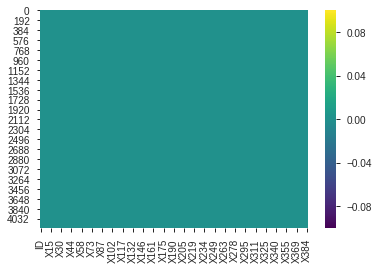

In [736]:
print("\n-> Checking if there are any null values in the dataset.\n")

if df_tr_up.isnull().values.any() == False:
    print("-> There are no null values in the dataset.\n")
    print("-> Heatmap to visually view null values if any.\n")
    print("*"*50, '\n')
    sns.heatmap(df_tr_up.isnull(), cmap = 'viridis')
    
else:
    print("-> There are null values in the dataset...\n")
    print("*"*50, '\n')
    sns.heatmap(df_tr_up.isnull(), cmap = 'viridis')

# Exploratory Data Analysis


-> Maximum time taken to test: 265.32 

-> Minimum time taken to test: 72.11 

************************************************** 


-> Plotting distribution of target variable.



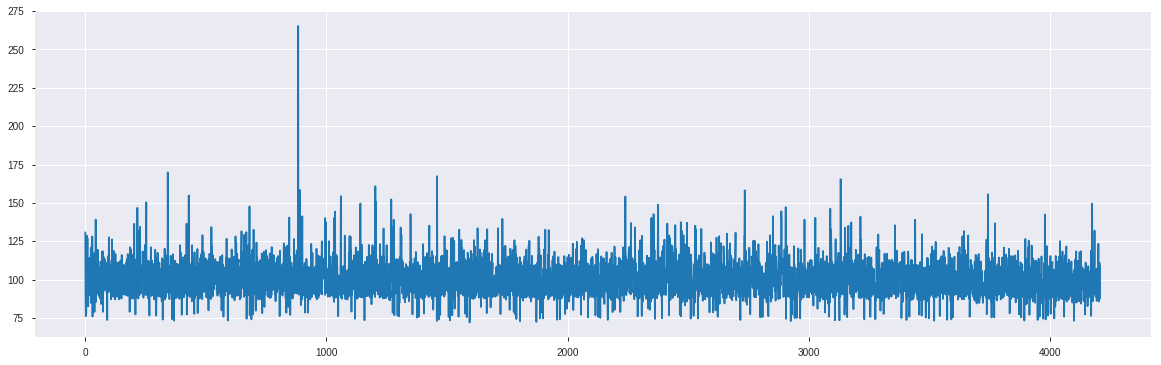

In [737]:
print("\n-> Maximum time taken to test:", df_tr_up.y.max(), '\n')
print("-> Minimum time taken to test:", df_tr_up.y.min(), '\n')
print("*"*50, '\n')
print("\n-> Plotting distribution of target variable.\n")
plt.figure(figsize = (20,6))
plt.plot(df_tr_up.y)

### Observation:

 - ___Distribution of target variable i.e time taken to test is almost linear with minor deviation. Also, we can see that highest time taken to test is around 265 seconds and lowest time taken to test is around 72 seconds.___


-> Box plot of target variable.



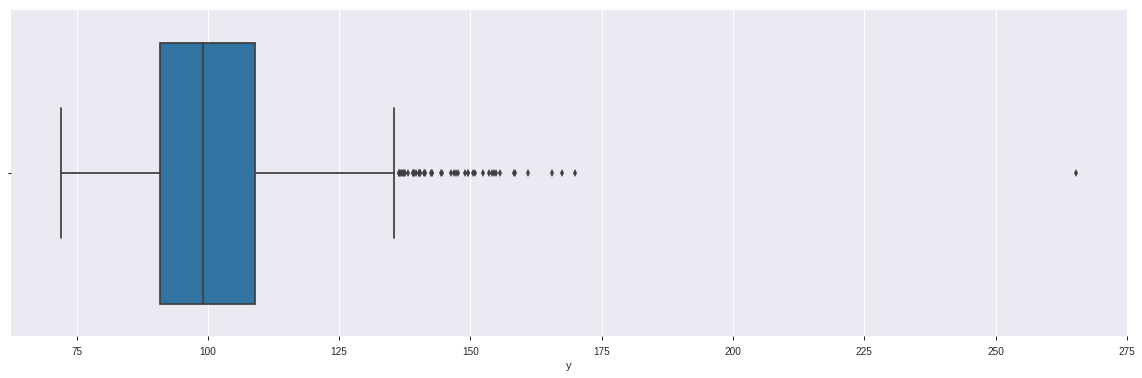

In [738]:
print("\n-> Box plot of target variable.\n")

plt.figure(figsize = (20,6))
sns.boxplot(df_tr_up.y)

### Observation:
 
 - ___Median of target variable is around 98___
 - ___Point (time in seconds to test) which is far from upper whisker. It shows that maximum time take to test is around 265 seconds and lowest time taken to test is around 72 seconds.___
 
 
 - ___Quartile Groups___

     - ___First quartile group (1st 25%), took 70 - 90 seconds to test.___
     - ___Second quartile group (2nd 25%), took 91 - 99 seconds to test.___
     - ___Third quartile group (3rd 25%), took 100 - 110 seconds to test.___
     - ___Fourth quartile group (4th 25%), took 111 - 130 seconds to test.___    
    

# Outlier

##### From the above 2 graphs, we can see an outlier that is a test has taken way too long. We need to remove that outlier.

In [739]:
print("\n -> Number of outlier we found i.e time taken to test is too long (>200):", len(df_tr_up[df_tr_up.y >= 200]['y']))

print("\n -> Outlier we found i.e time taken to test is too long (>200):", df_tr_up[df_tr_up.y >= 200]['y'], '\n')

print("Corresponding ID is")



 -> Number of outlier we found i.e time taken to test is too long (>200): 1

 -> Outlier we found i.e time taken to test is too long (>200): 883    265.32
Name: y, dtype: float64 

Corresponding ID is


In [741]:
print("\n -> Removing outlier...")

df_tr_up = df_tr_up.drop(index = df_tr_up[df_tr_up.y >= 200].index, axis = 0)


 -> Removing outlier...


##  Label Encoding

 - __Categorical Features__:
    - __8 features are categorical features. Applying label encoding so as to assign unique values to unique categories.__

### Renaming y label to target

In [0]:
df_tr_up.rename(index = str, columns = {'y': 'target'}, inplace = True)

In [744]:
print("\n -> Info of dataframe:\n")
print(df_tr_up.info(), '\n')

print("\n -> Head of dataframe:\n")
df_tr_up.head(2)


 -> Info of dataframe:

<class 'pandas.core.frame.DataFrame'>
Index: 4208 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(357), object(8)
memory usage: 11.8+ MB
None 


 -> Head of dataframe:



,ID,target,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Lable Encoder

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [0]:

df_tr_up['X0'] = le.fit_transform(df_tr_up.X0)

df_tr_up['X1'] = le.fit_transform(df_tr_up.X1)

df_tr_up['X2'] = le.fit_transform(df_tr_up.X2)

df_tr_up['X3'] = le.fit_transform(df_tr_up.X3)

df_tr_up['X4'] = le.fit_transform(df_tr_up.X4)

df_tr_up['X5'] = le.fit_transform(df_tr_up.X5)

df_tr_up['X6'] = le.fit_transform(df_tr_up.X6)

df_tr_up['X8'] = le.fit_transform(df_tr_up.X8)


In [0]:
# df_tr_up.to_csv('drive/My Drive/Mercedes Benz/train_df.csv', index = False)

In [750]:
print("\n-> Shape of x:", x.shape)
print("\n-> Shape of y_train:", y.shape, '\n')


-> Shape of x: (4208, 364)

-> Shape of y_train: (4208,) 



## Test set

In [0]:
dt = pd.read_csv('drive/My Drive/Mercedes Benz/test.csv')

In [753]:
print()
print("-> Shape of train dataframe:", dt.shape, '\n')
print("-> Number of rows in train dataframe:", dt.shape[0], '\n')
print("-> Number of columns in train dataframe:", dt.shape[1], '\n')
print("-> Column names of dataframe\n\n", dt.columns)


-> Shape of train dataframe: (4209, 377) 

-> Number of rows in train dataframe: 4209 

-> Number of columns in train dataframe: 377 

-> Column names of dataframe

 Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)



-> Checking if there are any null values in the dataset.

-> There are no null values in the dataset.

-> Heatmap to visually view null values if any.

************************************************** 



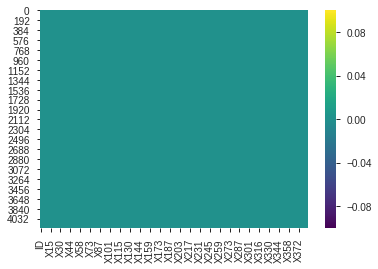

In [754]:
print("\n-> Checking if there are any null values in the dataset.\n")

if dt.isnull().values.any() == False:
    print("-> There are no null values in the dataset.\n")
    print("-> Heatmap to visually view null values if any.\n")
    print("*"*50, '\n')
    sns.heatmap(dt.isnull(), cmap = 'viridis')
    
else:
    print("-> There are null values in the dataset...\n")
    print("*"*50, '\n')
    sns.heatmap(dt.isnull(), cmap = 'viridis')

#### Features with constant value 0 or 1
- ___We will remove features with constant value 0 or 1.___

In [0]:
# Not considering columns of categorical type

dt_cor_type = dt.select_dtypes(exclude = [object])

con_val_t = []

for i in range(len(dt_cor_type.columns)):
    j = dt_cor_type.columns[i]
    
    # Constant value 0
    if dt_cor_type[j].max() == 0 and dt_cor_type[j].min() == 0:
        con_val_t.append(dt_cor_type.columns[i])
    
    # Constant value 1
    if dt_cor_type[j].max() == 1 and dt_cor_type[j].min() == 1:
        con_val_t.append(dt_cor_type.columns[i])

In [757]:
print("\n-> Number of features with constant value 0:", len(con_val_t), '\n')
print("-> Number of features which should not be considered for analysis:", len(con_val_t), '\n')


-> Number of features with constant value 0: 5 

-> Number of features which should not be considered for analysis: 5 



In [758]:
print("\n-> Removing", len(con_val_t), "features which has constant value 0 or 1.\n")
print("-> Number of columns in train dataframe before removing features:", dt.shape[1], '\n')

dt_up = dt.drop(con_val, axis = 1)

print("-> Number of columns in train dataframe after removing features with constant value 0 or 1:", dt_up.shape[1], '\n')


-> Removing 5 features which has constant value 0 or 1.

-> Number of columns in train dataframe before removing features: 377 

-> Number of columns in train dataframe after removing features with constant value 0 or 1: 365 



In [759]:
print("\n-> Percentage of data reduce to:", np.round(((dt_up.shape[1]) / dt.shape[1]) * 100, 3), '%\n')


-> Percentage of data reduce to: 96.817 %



## Label Encoding

In [0]:

dt_up['X0'] = le.fit_transform(dt_up.X0)

dt_up['X1'] = le.fit_transform(dt_up.X1)

dt_up['X2'] = le.fit_transform(dt_up.X2)

dt_up['X3'] = le.fit_transform(dt_up.X3)

dt_up['X4'] = le.fit_transform(dt_up.X4)

dt_up['X5'] = le.fit_transform(dt_up.X5)

dt_up['X6'] = le.fit_transform(dt_up.X6)

dt_up['X8'] = le.fit_transform(dt_up.X8)


In [0]:
# Keeping the test data 'ID' for future use.

test_id = dt_up.ID

In [0]:
# Dropping ID from test data

test = dt_up.drop('ID', axis = 1)

In [0]:
# Picking up only those columns which are in train set.

test = dt_up[x.columns]

In [0]:
# dt_up.to_csv('drive/My Drive/Mercedes Benz/test_df.csv', index = False)

## Algorithm: XGBoost

### Hyperparameters:

 - __n_estimators = 50__
 - __max_depth = 2__
 - __learning_rate = 0.1__
 - __colsample_bytree = 0.5__
 - __reg_alpha = 2__
 - __reg_lambda = 4__
 - __Objective = 'reg:squarederror'__
 
### After lots of hyperparameter tuning, above hyperparameters resulted in better score.

In [0]:
xg = XGBRegressor(n_estimators = 50, max_depth = 2, random_state = 0, objective = 'reg:squarederror',
                    learning_rate = 0.1, colsample_bytree = 0.5, reg_alpha = 2, reg_lambda = 4)

xg = xg.fit(x, y)
xg_pr = xg.predict(test)

t = pd.DataFrame()
t['ID'] = test_id
t['y'] = xg_pr

# 27
# t.to_csv('drive/My Drive/Mercedes Benz/predict_test_38.csv', index=False)

In [767]:
# Head of 10 from test data

print("\n-> Head of test data")
print('*'*21, '\n')

t.head(10)


-> Head of test data
********************* 



,ID,y
0,1,78.777870
1,2,94.023293
2,3,78.894402
3,4,78.777870
4,5,110.258301
5,8,92.524086
6,10,110.258301
7,11,94.023293
8,12,114.201706
9,14,94.376724


# Feature Engineering

## Checking for feature importance before feature engineering

###### Source Link: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

##### Source Link for code and feature engineering 2: 
https://nbviewer.jupyter.org/github/himanshuknegi/mercedes_benz_greener_manufacturing/blob/master/mercedes-benz-greener-manufacturing%20%281%29.ipynb

Feature importance using XGBoost


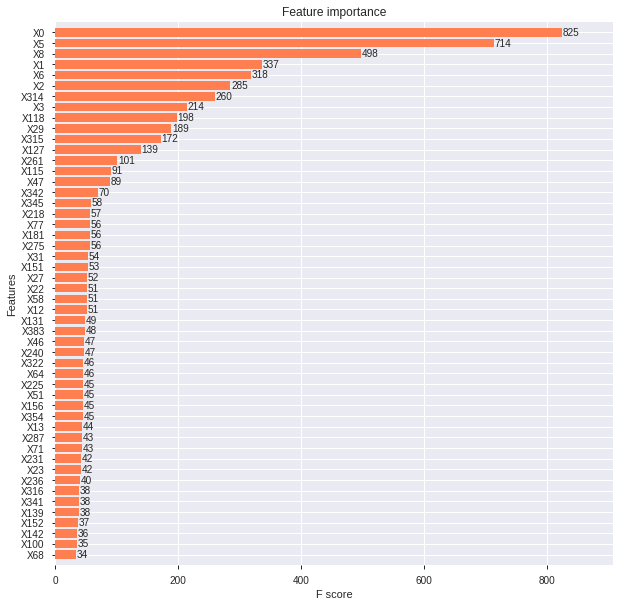

In [768]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

def r2_sc(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 3,
    'subsample': 0.05,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'base_score': np.mean(y_train)}

final = xgb.DMatrix(x, y, feature_names = x.columns.values)
model = xgb.train(dict(xgb_params), final, feval = r2_sc, num_boost_round = 1500, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features = 50, height = 0.8, ax = ax,color = 'coral')
print("Feature importance using XGBoost")
plt.show()

# Observation:
    
 - __Among categorical features, X0 is the most important feature with feature important value of 825__
 - __Among numerical features, X314, X118, X315 are the most important features with feature important value of 260, 198 and 172 respectively.__

# Train Set

##### Assigning independent variable to x_f and dependent variable to y_f

In [0]:
# x_f = pd.read_csv('drive/My Drive/Mercedes Benz/train_df.csv')

x_f = df_tr_up.drop(['ID','target'], axis = 1)
y_f = df_tr_up.target

### Feature Engineering - 1:

 - __We will add all the categorical features (X0, X1, X2, X3, X4, X5, X6, X8) and create a new feature 'X_add'__
 
### This is trail and error method

In [0]:
num_l = list(set(x_f.columns) - set(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']))

num_df = x_f[num_l]

x_f['X_add'] = num_df.sum(axis = 1)

### Feature Engineering - 2:

- __We will add 'X314' & 'X315' and create a new column 'X314_X315'__
- __We will add 'X314' & 'X118' and create a new column 'X314_X118'__
- __We will add 'X314', 'X315' & 'X118' and create a new column 'X314_X315_X118'__

In [0]:
# Test Set

# Adding X314 and X315
x_f['X314_X315'] = x_f.apply(lambda c: c['X314'] + c['X315'], axis = 1)

# Adding X314 and X118
x_f['X314_X118'] = x_f.apply(lambda c: c['X314'] + c['X118'], axis = 1)

# Adding X314, X315 and X118
x_f['X314_X315_X118'] = x_f.apply(lambda c: c['X314'] + c['X315'] + c['X118'] , axis = 1)


# Test set

In [0]:
# test = pd.read_csv('drive/My Drive/Mercedes Benz/test_df.csv')

test_f = test

### Feature Engineering - 1:

 - __We will add all the categorical features (X0, X1, X2, X3, X4, X5, X6, X8) and create a new feature 'X_add'__

In [0]:
num_l_te = list(set(test_f.columns) - set(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']))

num_df_te = test_f[num_l_te]

test_f['X_add'] = num_df_te.sum(axis = 1)

### Feature Engineering - 2:

- __We will add 'X314' & 'X315' and create a new column 'X314_X315'__
- __We will add 'X314' & 'X118' and create a new column 'X314_X118'__
- __We will add 'X314', 'X315' & 'X118' and create a new column 'X314_X315_X118'__

In [0]:
# Test Set

# Adding X314 and X315
test_f['X314_X315'] = test_f.apply(lambda c: c['X314'] + c['X315'], axis = 1)

# Adding X314 and X118
test_f['X314_X118'] = test_f.apply(lambda c: c['X314'] + c['X118'], axis = 1)

# Adding X314, X315 and X118
test_f['X314_X315_X118'] = test_f.apply(lambda c: c['X314'] + c['X315'] + c['X118'] , axis = 1)


In [792]:
# Shape before feature engineering
print("\n-> Shape of train data before feature engineering:", x.shape)
print("-> Shape of test data before feature engineering:", test.shape, '\n')


# Shape after feature engineering
print("\n-> Shape of train data after feature engineering:", x_f.shape)
print("-> Shape of test data after feature engineering::", test_f.shape, '\n')


-> Shape of train data before feature engineering: (4208, 364)
-> Shape of test data before feature engineering: (4209, 369) 


-> Shape of train data after feature engineering: (4208, 368)
-> Shape of test data after feature engineering:: (4209, 369) 



##### Considering only train columns

In [0]:
test_fe = test_f[x_f.columns] 

In [797]:
# Shape before feature engineering
print("\n-> Shape of x_f:", x_f.shape)
print("-> Shape of test_fe data:", test_fe.shape, '\n')


-> Shape of x_f: (4208, 368)
-> Shape of test_fe data: (4209, 368) 



## Checking for feature importance after feature engineering

Source link: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

Feature importance using XGBoost


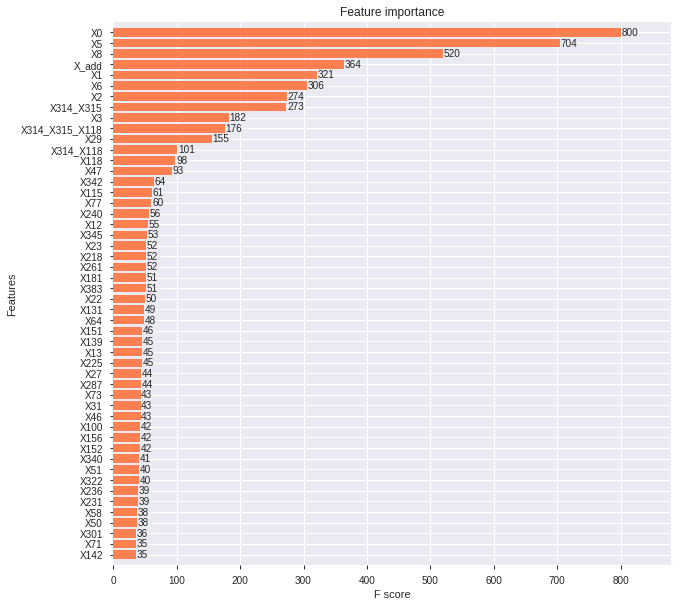

In [798]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

def r2_sc(preds, final_f):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 3,
    'subsample': 0.05,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'base_score': np.mean(y_f)}

final_f = xgb.DMatrix(x_f, y_f, feature_names = x_f.columns.values)
model_f = xgb.train(dict(xgb_params), final_f, feval = r2_sc, num_boost_round = 1500, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model_f, max_num_features = 50, height = 0.8, ax = ax,color = 'coral')
print("Feature importance using XGBoost")
plt.show()

# Observation:
    
 - __'X_add' feature is showing up in top 5 important features.__
 - __'X_314_X315', 'X_314_X118', 'X314_X315_X118' features are showing up in top 15 features.__
    
### We can see from the above graph that added 4 extra features from the provided data is showing up in top 15 features. This will certainly improve our model r2 score.

## Algorithm: XGBoost

### Hyperparameters:

 - __n_estimators = 61__
 - __max_depth = 4__
 - __learning_rate = 0.1__
 - __colsample_bytree = 0.708__
 - __reg_alpha = 2__
 - __reg_lambda = 4__
 - __Objective = 'reg:squarederror'__
 
### After lots of hyperparameter tuning, above hyperparameters resulted in better score.

In [0]:
xg_f = XGBRegressor(n_estimators = 61, max_depth = 4,
                    random_state = 0, learning_rate = 0.1,
                    objective =  'reg:squarederror',
                    colsample_bytree = 0.708,
                    reg_alpha = 2, reg_lambda = 4)

xg_f = xg_f.fit(x_f, y_f)
xg_pr_f = xg_f.predict(test_fe)

t_f = pd.DataFrame()
t_f['ID'] = test_id
t_f['y'] = xg_pr_f

# 124
# t_f.to_csv('drive/My Drive/Mercedes Benz/predict_test_132.csv', index=False)

In [800]:
# Head of 10 from test data

print("\n-> Head of test data")
print('*'*21, '\n')

t_f.head(10)


-> Head of test data
********************* 



,ID,y
0,1,80.430557
1,2,97.388908
2,3,81.557472
3,4,76.853920
4,5,110.834717
5,8,91.420029
6,10,110.977165
7,11,94.524185
8,12,115.967415
9,14,94.329880


# Score before feature engineering

![title](Score_0.54213.png)

# Score after feature engineering

![title](Score_0.55218.png)

# Pretty Table

In [50]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ["S.No", "Algorithm", "Feature Engineering", "n_estimators", "max_depth", "Private score (r2)", "Public score (r2)"]

a.add_row([ (1), "XGBoost", "Not applied", '50', 2, 0.54213, 0.54214])
a.add_row([('-'), '-----','-----','-----','-----','-----', '-----'])
a.add_row([ (2), "XGBoost", "Applied", '61', 4, 0.55218, 0.55507])

print(a.get_string(title = "Summary Table for Logistic Regression"))


+------+-----------+---------------------+--------------+-----------+--------------------+-------------------+
| S.No | Algorithm | Feature Engineering | n_estimators | max_depth | Private score (r2) | Public score (r2) |
+------+-----------+---------------------+--------------+-----------+--------------------+-------------------+
|  1   |  XGBoost  |     Not applied     |      50      |     2     |      0.54213       |      0.54214      |
|  -   |   -----   |        -----        |    -----     |   -----   |       -----        |       -----       |
|  2   |  XGBoost  |       Applied       |      61      |     4     |      0.55218       |      0.55507      |
+------+-----------+---------------------+--------------+-----------+--------------------+-------------------+


# Conclusion:

 - __Before applying feature engineering, priveate score is 0.54213 and public score is 0.54214.__
 - __After applying feature engineering, private score is 0.54218 and public score is 0.55507.__
 
### Overall conclusion:

 - __After applying feature engineering, private score is increased by almost 0.01 and public score by 0.013.__

# Step-by-step procedure:


## Data overview
    
 - __Train and test dataset is imported.__
 - __Overviewed data like shape and size of the data, number of columns and rows, etc.__


## Exploratory Data Analysis:


 - __Checked for null values with seaborn heatmap.__
 - __With in-built pandas profiling, checked how variables are correlated to each other, also had a view of mean, median, null values and constant values.__
 - __Checked for outliers.__
 - __With boxplot and histogram, analyzed dependent variable like mean, median, quartiles and also outliers.__


## Data Preparation:


 - __Removed features with constant value 0 and 1.__
 - __Filled null values with approprate values if there are any.__
 - __Label encoded the categorical features.____
 - __Assigned independent variables to x and dependent variable to y.__
 - __Stored test ID for further use.__


## Feature Engineering:


 - __Feature Engineering - 1:__
 
     - __We will add all the categorical features (X0, X1, X2, X3, X4, X5, X6, X8) and create a new feature 'X_add'.__
     

 - __Feature Engineering - 1:__
 
    - __We will add 'X314' & 'X315' and create a new column 'X314_X315'__
    - __We will add 'X314' & 'X118' and create a new column 'X314_X118'__
    - __We will add 'X314', 'X315' & 'X118' and create a new column 'X314_X315_X118'__
    
## Machine Learning Model with XGBoost:


 - __With below hyperparameters before feature engineering__
 
     - __n_estimators = 50__
     - __max_depth = 2__
     - __learning_rate = 0.1__
     - __colsample_bytree = 0.5__
     - __reg_alpha = 2__
     - __reg_lambda = 4__
     - __Objective = 'reg:squarederror'__
     
     
 - __R2 score (Co-efficient of Determination)__
 
     - __Private score: 0.54213__
     - __Public score: 0.54214__
     
 
 - __With below hyperparameters after feature engineering__
 
     - __n_estimators = 61__
     - __max_depth = 4__
     - __learning_rate = 0.1__
     - __colsample_bytree = 0.708__
     - __reg_alpha = 2__
     - __reg_lambda = 4__
     - __Objective = 'reg:squarederror'__

 
- __R2 score (Co-efficient of Determination)__
 
     - __Private score: 0.55218__
     - __Public score: 0.55507__
     
     

## Conclusion:

 - __Before applying feature engineering, priveate score is 0.54213 and public score is 0.54214.__
 - __After applying feature engineering, private score is 0.54218 and public score is 0.55507.__
 
 
### Overall conclusion:

 - __After applying feature engineering, private score is increased by almost 0.01 and public score by 0.013.__